
--- Linear SVM ---
[[106   2]
 [  3  60]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


--- RBF SVM ---
[[105   3]
 [  8  55]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



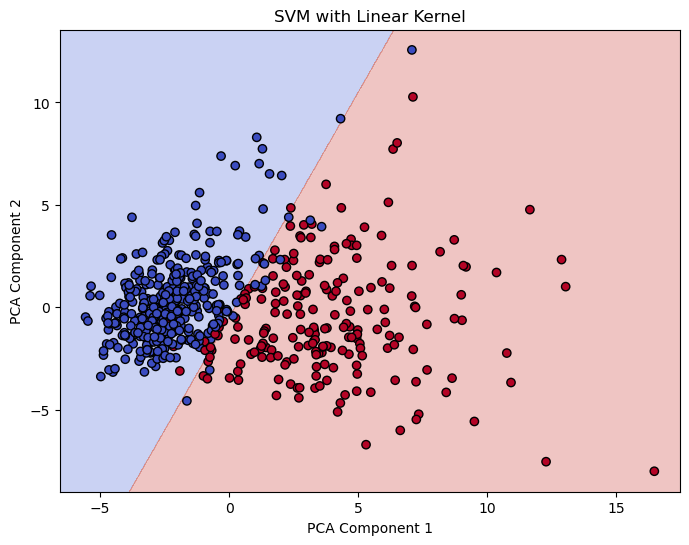

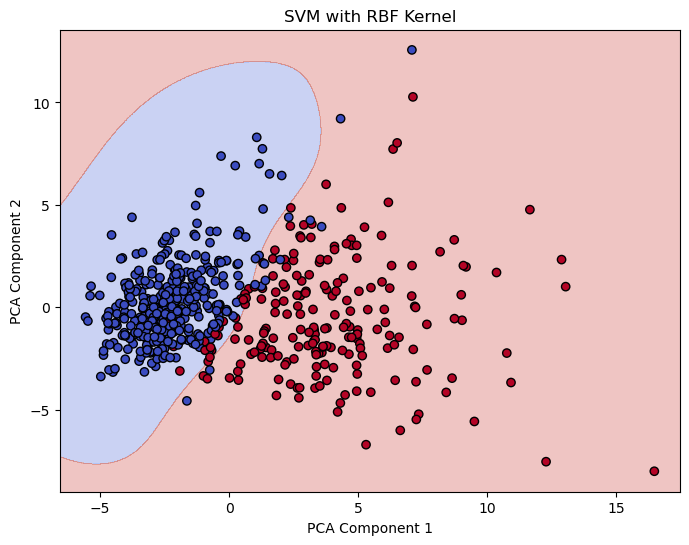

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Loading dataset
data = pd.read_csv(r"D:\Elevate Labs Internship\Task 07 Dataset.csv")

# Finding column containing 'M' and 'B'
label_col = None
for col in data.columns:
    if data[col].astype(str).str.contains('M|B').any():
        label_col = col
        break

if label_col is None:
    raise ValueError("No column with labels 'M' or 'B' found.")

# Encoding 'M' as 1 and 'B' as 0
data[label_col] = data[label_col].map({'M': 1, 'B': 0})

# Handling missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Droping remaining non-numeric columns 
data = pd.get_dummies(data, drop_first=True)

# Separating features and target
X = data.drop(label_col, axis=1).values
y = data[label_col].values

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducing it to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Training split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Training SVM models
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Evaluating
print("\n--- Linear SVM ---")
print(confusion_matrix(y_test, svm_linear.predict(X_test)))
print(classification_report(y_test, svm_linear.predict(X_test)))

print("\n--- RBF SVM ---")
print(confusion_matrix(y_test, svm_rbf.predict(X_test)))
print(classification_report(y_test, svm_rbf.predict(X_test)))

# Decision boundary plot function
def plot_svm_decision(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Plot the figure
plot_svm_decision(svm_linear, X_pca, y, "SVM with Linear Kernel")
plot_svm_decision(svm_rbf, X_pca, y, "SVM with RBF Kernel")
